In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_excel('Data/T_ZB_Env.xlsx')
# drop Note column, since it contains all null values 
df.drop('NOTE', axis = 1, inplace = True)

In [28]:
df.rename(columns = {'INSTR_NO' : 'Description', 'DT' : 'Date', 'VAL' : 'Value'}, inplace = True)

In [31]:
df['Description'] = df.Description.map({'出库流量' : 'Amount Out', '入库流量' : 'Amount in',
                                       '上游水位' : 'Upstream Level', '下游水位' : 'Downstream Level',
                                       '降雨量' : 'Rainfall'})

In [56]:
df['YearMonth'] = df.Date.dt.to_period('M').astype('str')

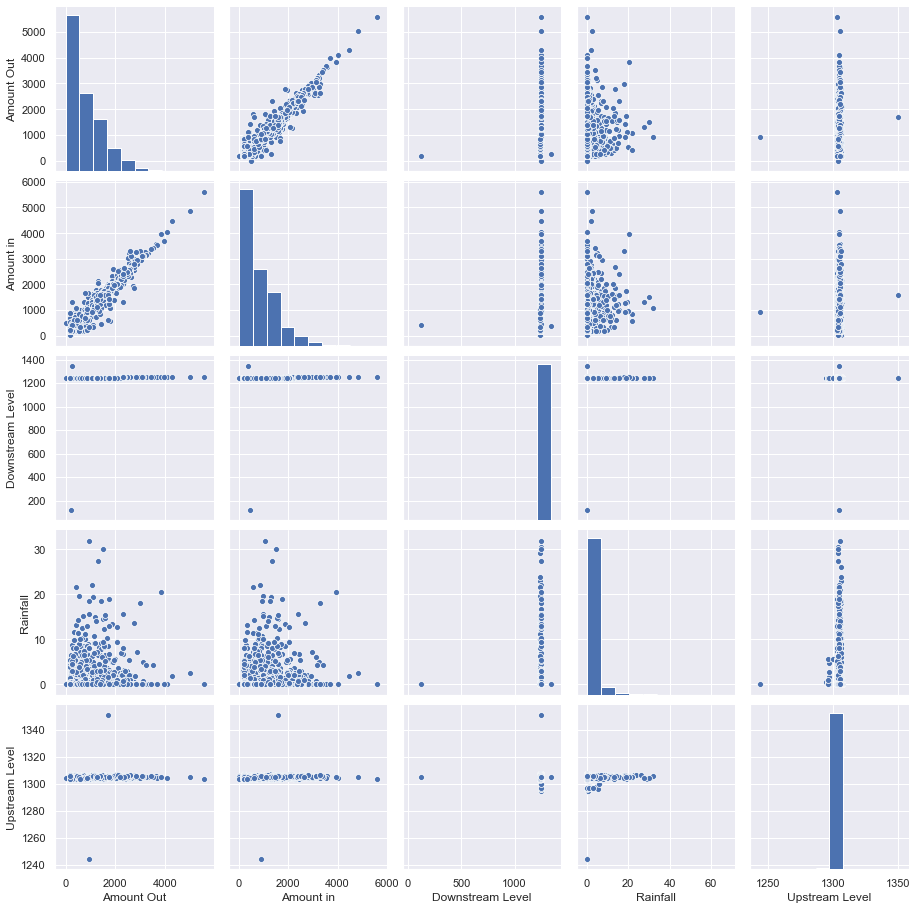

In [120]:
df_date = df.pivot_table(values = 'Value', index = 'Date', columns = 'Description')
sns.pairplot(data = df_date)
# Amount out and amount in have strong linear relationship 
# Downstream level and upstream level seems to be independent of amoutn out and amount in 

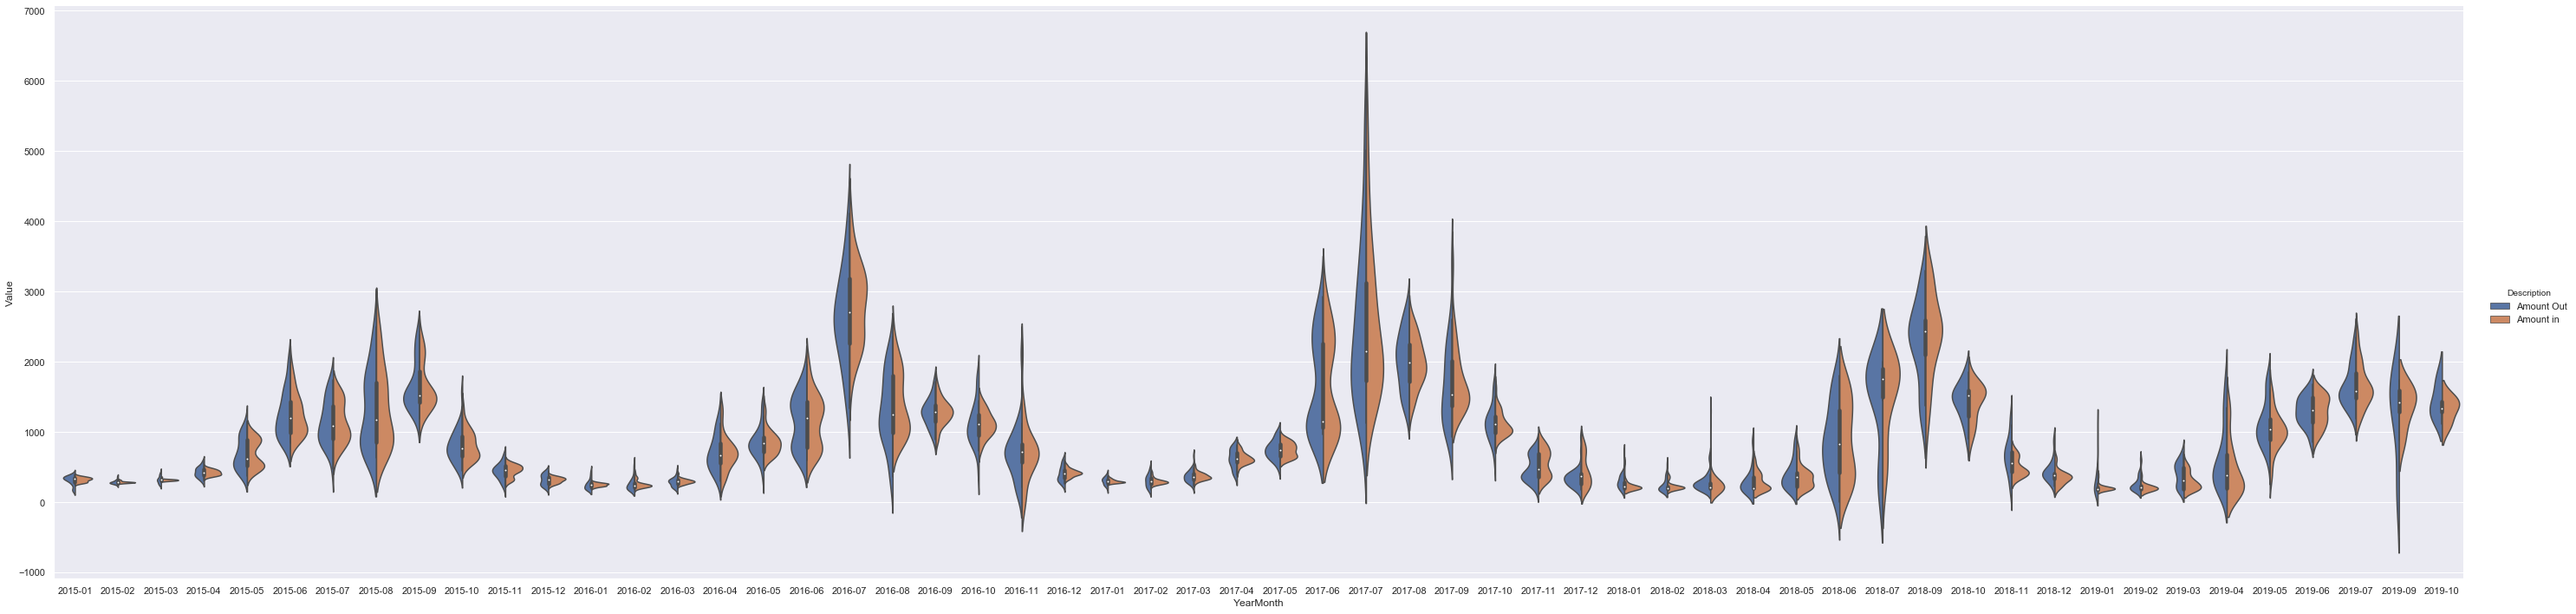

In [110]:
amount = df[(df.Description == 'Amount Out') | (df.Description == 'Amount in')]
#des = description[0]
ax = sns.catplot(x = 'YearMonth', y = 'Value', hue = 'Description',  data = amount,
            kind = 'violin', split = True,
           height=10, aspect=4/1)

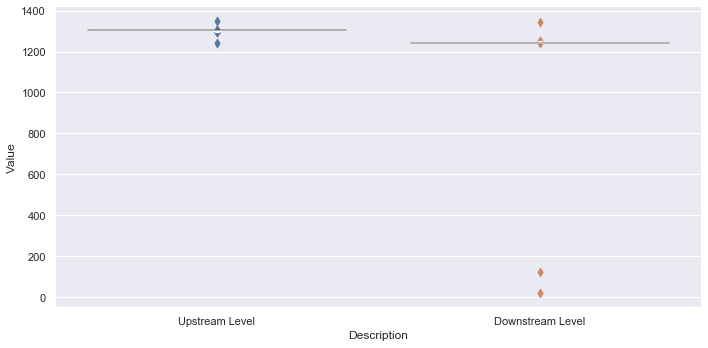

In [103]:
stream = df.loc[(df.Description == 'Downstream Level') | (df.Description == 'Upstream Level') , 
                ['YearMonth', 'Description', 'Value']]
sns.catplot(x = 'Description', y = 'Value', data = stream,
           kind = 'boxen', 
           height = 5, aspect = 2/1)
# this graph shows that the water level is pretty much stable, the two outliers are extremely erroneous  

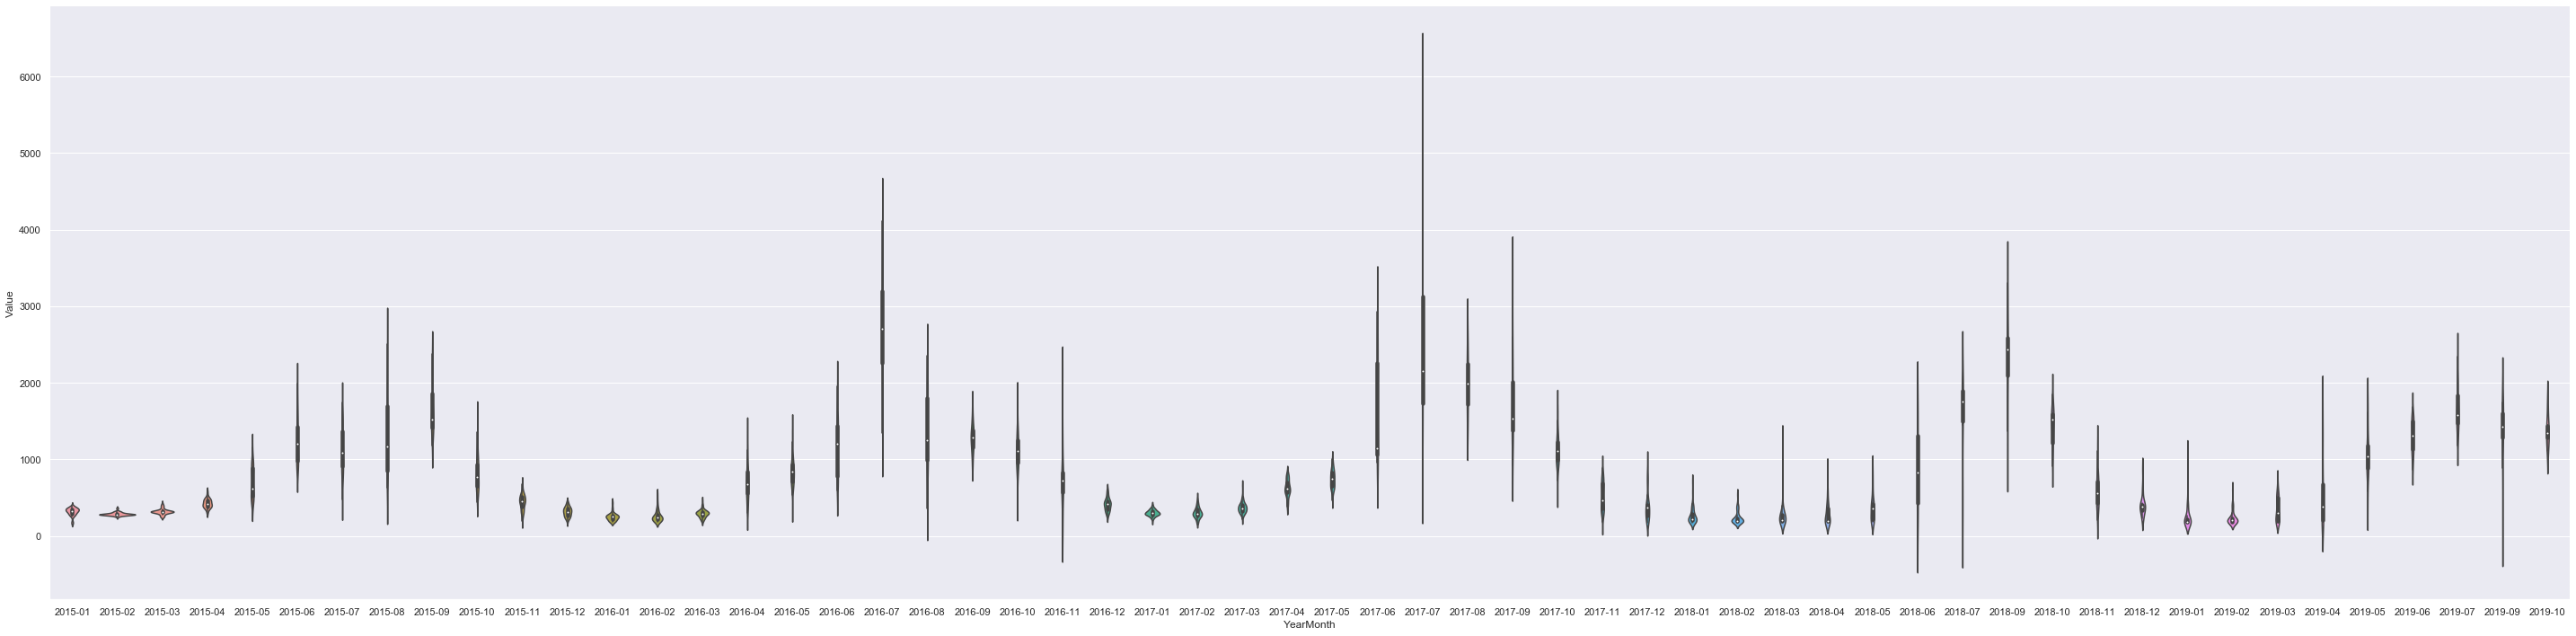

In [116]:
rain = stream = df.loc[(df.Description == 'Rainfall') , 
                ['YearMonth', 'Value']]
sns.catplot(x = 'YearMonth', y = 'Value',  data = amount,
            kind = 'violin',
           height=10, aspect=4/1)